Import Libraries

In [33]:

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
from sklearn.decomposition import PCA

Load dataset and preprocess it

In [34]:
# import diabetes.csv as a dataframe
df_diabetes = pd.read_csv('diabetes.csv')

# put column names in a list
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
             'Age']

# remove rows with 0 as values for columns Glucose, BloodPressure, SkinThickness, Insulin, BMI
df_diabetes = df_diabetes[(df_diabetes['Glucose'] != 0) & (df_diabetes['BloodPressure'] != 0) & (
        df_diabetes['SkinThickness'] != 0) & (df_diabetes['Insulin'] != 0) & (df_diabetes['BMI'] != 0)]

# normalize the dataframe
scaler = MinMaxScaler()
df_diabetes[col_names] = scaler.fit_transform(df_diabetes[col_names])

# Separate features and target variable
X = df_diabetes[col_names]  # Features (all columns except the last one)
y = df_diabetes['Outcome']   # Target variable


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use GridSearch to automate the process of looking for the best parameters

In [35]:
# Create and fit the model
mlr_model = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.775


/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.pe

Use the best parameters for training and calculate the accuracy

In [36]:
# Train the logistic regression model on the entire training set using the best parameters
mlr_model = LogisticRegression(**best_params)
mlr_model.fit(X_train, y_train)

# Predictions on the test set
test_pred = mlr_model.predict(X_test)

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy for Combined Data: 0.7901234567901234


Compute and plot the Confusion Matrix and the error rate

Error rate: 20.99%


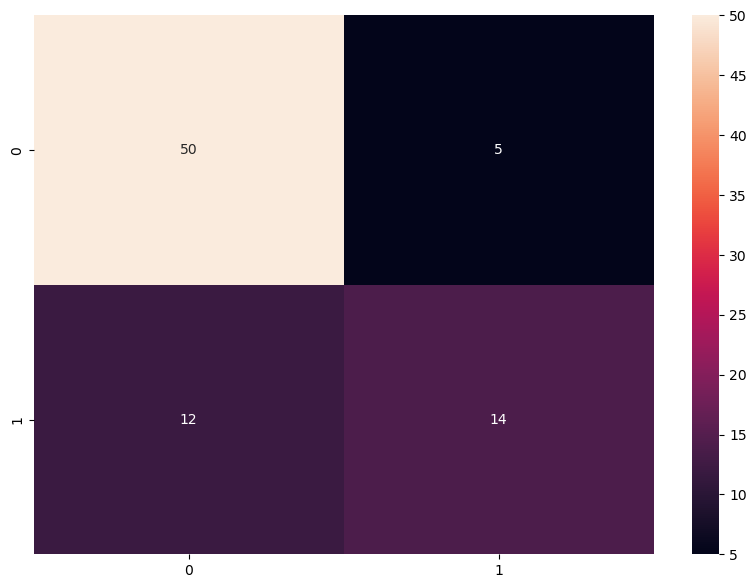

In [37]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Compute classification error percentage
error_rate = 100 * (conf_matrix[0, 1] + conf_matrix[1, 0]) / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1])
print('Error rate: {:.2f}%'.format(error_rate))

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix, annot=True)
plt.show()
plt.show()

Compute and plot ROC

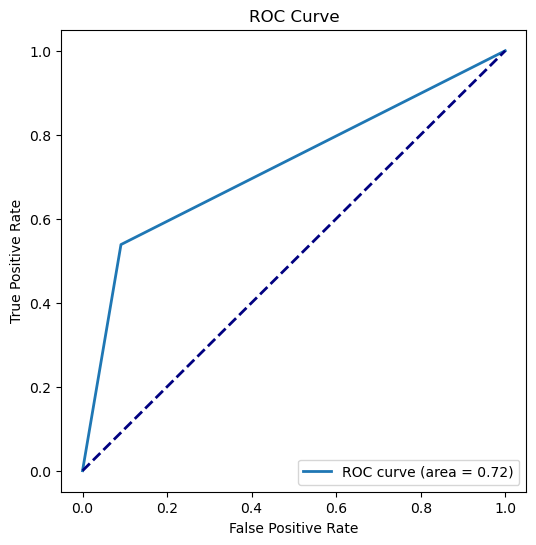

In [42]:
# Compute ROC curve and AUC for Combined Data
fpr, tpr, _ = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



Data Visualization

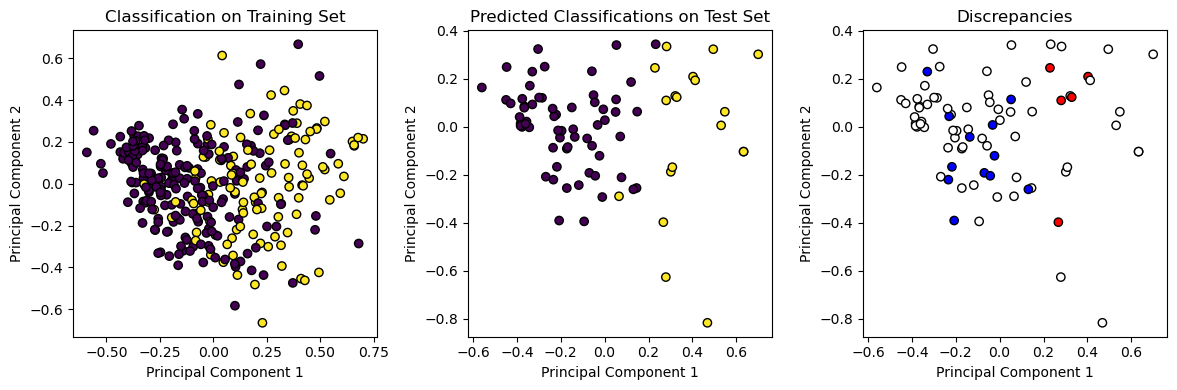

In [39]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot 1: Classification Dynamics on the Training Set
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('Classification on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 2: Predicted Classifications on the Test Set
X_test_pca = pca.transform(X_test)
test_pred_pca = pca.transform(X_test)

plt.subplot(1, 3, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_pred, cmap='viridis', edgecolor='k')
plt.title('Predicted Classifications on Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 3: Discrepancies between Predicted and True Classifications
discrepancies = test_pred - y_test.values
plt.subplot(1, 3, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=discrepancies, cmap='bwr', edgecolor='k')
plt.title('Discrepancies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()